In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

df = pd.read_csv('/Users/giovanni-lunetta/uconn_masters/hockey/final_data.csv')

In [126]:
df.columns

Index(['Date', 'Opponent', 'Team_Total_UConn_Score',
       'Team_Total_Opponent_Score', 'Home', 'Win', 'Team_Score_On_PP',
       'Team_PP_Faceoffs_won_in_OZ_percent', 'Team_PP_Faceoffs_won_percent',
       'Team_Shots_OT_Behind_Net', 'Team_Shots_Behind_Net',
       'Team_Goals_Behind_Net', 'Team_Shots_OT_at_Net', 'Team_Shots_at_Net',
       'Team_Goals_at_Net', 'Team_Shots_OT_Left_Close',
       'Team_Shots_Left_Close', 'Team_Goals_Left_Close',
       'Team_Shots_OT_Center_Close', 'Team_Shots_Center_Close',
       'Team_Goals_Center_Close', 'Team_Shots_OT_Right_Close',
       'Team_Shots_Right_Close', 'Team_Goals_Right_Close',
       'Team_Shots_OT_Left_Far', 'Team_Shots_Left_Far', 'Team_Goals_Left_Far',
       'Team_Shots_OT_Center_Far', 'Team_Shots_Center_Far',
       'Team_Goals_Center_Far', 'Team_Shots_OT_Right_Far',
       'Team_Shots_Right_Far', 'Team_Goals_Right_Far',
       'Team_Shots_OT_Not_in_Offensive_Zone',
       'Team_Shots_Not_in_Offensive_Zone', 'Team_Goals_Not_in_Of

In [127]:
# Removing the duplicate column 'Team_Shots_Behind_Net'
data_cleaned = df.drop('Team_Shots_Behind_Net', axis=1)

# Checking for columns that have all zeros
columns_all_zeros = data_cleaned.columns[(data_cleaned == 0).all()]
columns_all_zeros

Index(['Team_Goals_Behind_Net', 'Team_Goals_Not_in_Offensive_Zone'], dtype='object')

In [128]:
# Dropping columns with all zeros
data_cleaned = data_cleaned.drop(columns=columns_all_zeros)

In [129]:
# Dropping non-numeric columns for simplicity
df = df.drop(columns=['Date', 'Opponent'])
df = df.drop(columns=['Team_Total_UConn_Score', 'Team_Total_Opponent_Score'])
df = df.drop(columns=['Team_Shots_OT_Behind_Net', 'Team_Shots_Behind_Net', 'Team_Goals_Behind_Net'])
df = df.drop(columns=['Team_PP_Faceoffs_won_in_OZ_percent', 'Team_Goals_Not_in_Offensive_Zone'])

In [130]:
import statsmodels.formula.api as smf

# Joining all column names with '+' except 'Win', 'Date', and 'Opponent'
formula = 'Win ~ ' + ' + '.join(df.columns.drop('Win'))

# Fitting the logistic regression model using smf.logit
logit_model = smf.logit(formula=formula, data=df).fit()

# Displaying the summary of the model
logit_model_summary = logit_model.summary()
logit_model_summary

         Current function value: 0.501595
         Iterations: 35


/Users/giovanni-lunetta/Library/Python/3.10/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Win   No. Observations:                  110
Model:                          Logit   Df Residuals:                       80
Method:                           MLE   Df Model:                           29
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.2701
Time:                        12:50:42   Log-Likelihood:                -55.175
converged:                      False   LL-Null:                       -75.590
Covariance Type:            nonrobust   LLR p-value:                   0.07126
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -4.0347      1.819     -2.218      0.027      -7.600      -0.469
Home                                    0.2455      0.538      0.456      0.648      -0.809       1.300
Team_Score_On_PP                       -0.7143      0.877     -0.815      0.415      -2.433       1.004
Team_PP_Faceoffs_won_percent            0.0324      0.015      2.197      0.028       0.004       0.061
Team_Shots_OT_at_Net                    1.0630      0.687      1.548      0.122      -0.283       2.409
Team_Shots_at_Net                      -0.4428      0.550     -0.804      0.421      -1.522       0.636
Team_Goals_at_Net                       0.2230      0.665      0.335      0.737      -1.080       1.526
Team_Shots_OT_Left_Close                0.7856      0.478      1.643      0.100      -0.151       1.723
Team_Shots_Left_Close                  -0.4516      0.383     -1.180      0.238      -1.202       0.299
Team_Goals_Left_Close                   1.7281      1.727      1.001      0.317      -1.657       5.113
Team_Shots_OT_Center_Close             -0.1511      0.345     -0.438      0.661      -0.827       0.525
Team_Shots_Center_Close                -0.2721      0.216     -1.258      0.208      -0.696       0.152
Team_Goals_Center_Close                 1.3111      0.847      1.548      0.122      -0.349       2.972
Team_Shots_OT_Right_Close               0.5649      0.457      1.236      0.216      -0.331       1.461
Team_Shots_Right_Close                  0.0174      0.369      0.047      0.962      -0.707       0.742
Team_Goals_Right_Close                -35.4667   5.56e+07  -6.38e-07      1.000   -1.09e+08    1.09e+08
Team_Shots_OT_Left_Far                  0.2178      0.760      0.286      0.775      -1.272       1.708
Team_Shots_Left_Far                     0.0757      0.472      0.160      0.873      -0.850       1.002
Team_Goals_Left_Far                    36.5677   6.71e+07   5.45e-07      1.000   -1.32e+08    1.32e+08
Team_Shots_OT_Center_Far               -0.0457      0.446     -0.102      0.918      -0.920       0.828
Team_Shots_Center_Far                  -0.2383      0.212     -1.122      0.262      -0.655       0.178
Team_Goals_Center_Far                  25.9586   4.65e+04      0.001      1.000    -9.1e+04    9.11e+04
Team_Shots_OT_Right_Far                 0.3775      0.706      0.535      0.593      -1.007       1.762
Team_Shots_Right_Far                   -0.3988      0.457     -0.872      0.383      -1.295       0.497
Team_Goals_Right_Far                  -37.0806   5.56e+07  -6.67e-07      1.000   -1.09e+08    1.09e+08
Team_Shots_OT_Not_in_Offensive_Zone    16.8973   2493.072      0.007      0.995   -4869.435    4903.229
Team_Shots_Not_in_Offensive_Zone      -15.1358   2493.072     -0.006      0.995   -4901.467    4871.196
Team_PP_OZ_possession_percent           0.0408      0.020      2.046      0.041       0.002       0.080
Team_PP_NZ_posses

(array([ 4.,  2.,  3.,  3.,  7.,  7.,  3.,  6.,  7.,  4., 11., 11.,  9.,
         8.,  5.,  9.,  3.,  3.,  3.,  2.]),
 array([-0.88656364, -0.79971038, -0.71285711, -0.62600385, -0.53915058,
        -0.45229731, -0.36544405, -0.27859078, -0.19173752, -0.10488425,
        -0.01803098,  0.06882228,  0.15567555,  0.24252881,  0.32938208,
         0.41623535,  0.50308861,  0.58994188,  0.67679514,  0.76364841,
         0.85050168]),
 <BarContainer object of 20 artists>)

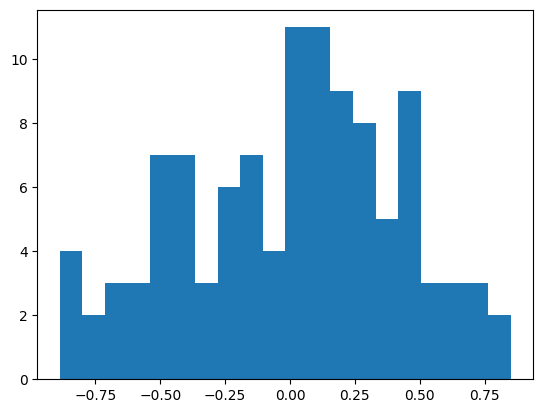

In [131]:
import matplotlib.pyplot as plt

residuals = logit_model.resid_generalized
plt.hist(residuals, bins=20)

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only the independent variables
X = df.drop('Win', axis=1)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
4,Team_Shots_at_Net,21.091248
3,Team_Shots_OT_at_Net,20.055187
26,Team_PP_OZ_possession_percent,16.630622
28,Team_PP_DZ_possession_percent,11.422348
2,Team_PP_Faceoffs_won_percent,10.657155
27,Team_PP_NZ_possession_percent,9.341995
19,Team_Shots_Center_Far,7.832659
7,Team_Shots_Left_Close,7.688664
13,Team_Shots_Right_Close,7.577452
24,Team_Shots_OT_Not_in_Offensive_Zone,7.360649


In [133]:
df = df.drop(columns=['Team_Shots_OT_at_Net'])
# df = df.drop(columns=['Team_PP_DZ_possession_percent'])

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only the independent variables
X = df.drop('Win', axis=1)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
25,Team_PP_OZ_possession_percent,16.630435
27,Team_PP_DZ_possession_percent,10.770293
2,Team_PP_Faceoffs_won_percent,10.503175
26,Team_PP_NZ_possession_percent,9.244843
18,Team_Shots_Center_Far,7.561457
12,Team_Shots_Right_Close,7.467940
23,Team_Shots_OT_Not_in_Offensive_Zone,7.268818
24,Team_Shots_Not_in_Offensive_Zone,7.164546
6,Team_Shots_Left_Close,7.099967
9,Team_Shots_Center_Close,7.068824


In [135]:
df = df.drop(columns=['Team_Goals_Right_Close', 'Team_Goals_Left_Far', 'Team_Goals_Center_Far', 'Team_Goals_Right_Far', 'Team_Shots_OT_Not_in_Offensive_Zone', 'Team_Shots_Not_in_Offensive_Zone'])

In [137]:
import statsmodels.formula.api as smf

# Joining all column names with '+' except 'Win', 'Date', and 'Opponent'
formula = 'Win ~ ' + ' + '.join(df.columns.drop('Win'))

# Fitting the logistic regression model using smf.logit
logit_model = smf.logit(formula=formula, data=df).fit()

# Displaying the summary of the model
logit_model_summary = logit_model.summary()
logit_model_summary

Optimization terminated successfully.
         Current function value: 0.576667
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Win   No. Observations:                  110
Model:                          Logit   Df Residuals:                       87
Method:                           MLE   Df Model:                           22
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                  0.1608
Time:                        12:55:39   Log-Likelihood:                -63.433
converged:                       True   LL-Null:                       -75.590
Covariance Type:            nonrobust   LLR p-value:                    0.3310
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.8386      1.679     -2.286      0.022      -7.130      -0.547
Home                              0.4161      0.487      0.854      0.393      -0.539       1.372
Team_Score_On_PP                 -0.6707      0.734     -0.914      0.361      -2.110       0.768
Team_PP_Faceoffs_won_percent      0.0320      0.014      2.363      0.018       0.005       0.058
Team_Shots_at_Net                 0.4058      0.209      1.945      0.052      -0.003       0.815
Team_Goals_at_Net                 0.4165      0.588      0.708      0.479      -0.736       1.569
Team_Shots_OT_Left_Close          0.5352      0.400      1.338      0.181      -0.249       1.319
Team_Shots_Left_Close            -0.2931      0.323     -0.908      0.364      -0.926       0.340
Team_Goals_Left_Close             1.3515      1.635      0.827      0.408      -1.853       4.556
Team_Shots_OT_Center_Close       -0.0171      0.328     -0.052      0.958      -0.660       0.626
Team_Shots_Center_Close          -0.2185      0.206     -1.063      0.288      -0.621       0.184
Team_Goals_Center_Close           1.0175      0.741      1.373      0.170      -0.435       2.470
Team_Shots_OT_Right_Close         0.4856      0.408      1.192      0.233      -0.313       1.284
Team_Shots_Right_Close           -0.1238      0.341     -0.363      0.717      -0.792       0.545
Team_Shots_OT_Left_Far           -0.0198      0.638     -0.031      0.975      -1.271       1.231
Team_Shots_Left_Far               0.2053      0.417      0.493      0.622      -0.612       1.022
Team_Shots_OT_Center_Far          0.0941      0.353      0.266      0.790      -0.598       0.786
Team_Shots_Center_Far            -0.2046      0.189     -1.085      0.278      -0.574       0.165
Team_Shots_OT_Right_Far           0.2789      0.629      0.443      0.658      -0.955       1.513
Team_Shots_Right_Far             -0.3100      0.429     -0.722      0.470      -1.151       0.531
Team_PP_OZ_possession_percent     0.0385      0.019      2.060      0.039       0.002       0.075
Team_PP_NZ_possession_percent    -0.1078      0.071     -1.512      0.131      -0.248       0.032
Team_PP_DZ_possession_percent     0.0662      0.053      1.259      0.208      -0.037       0.169
=================================================================================================
"""

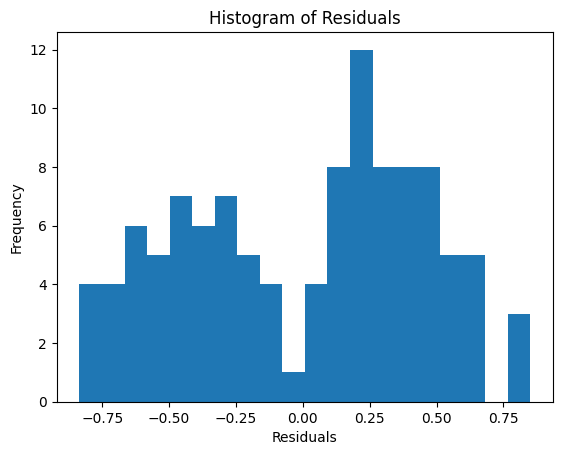

In [138]:
import matplotlib.pyplot as plt

residuals = logit_model.resid_generalized
plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

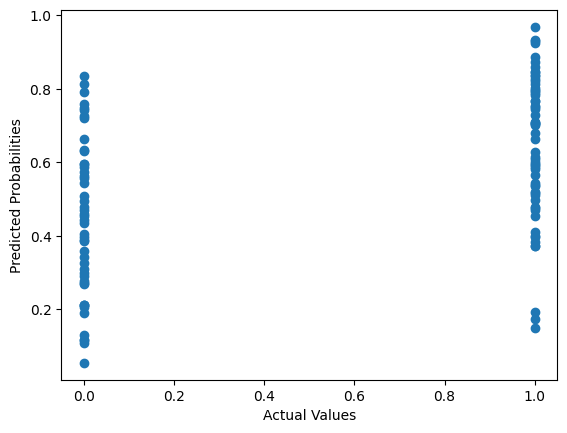

In [139]:
predictions = logit_model.predict(df)
plt.scatter(df['Win'], predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Probabilities')
plt.show()

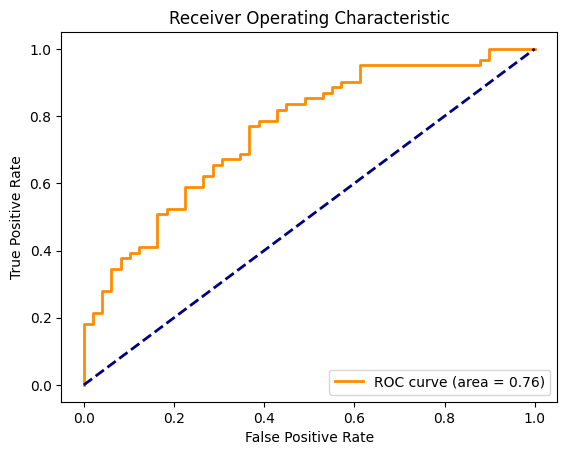

In [140]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df['Win'], predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

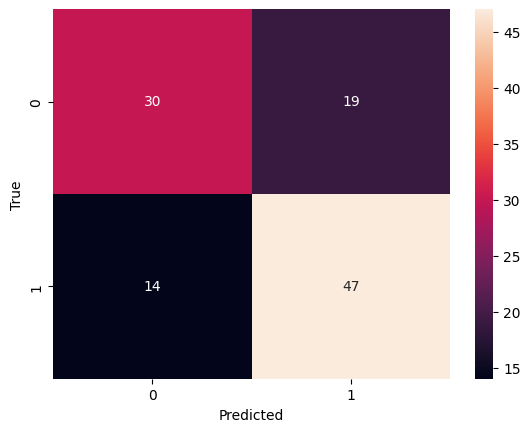

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert probabilities to 0/1 predictions based on a chosen threshold (e.g., 0.5)
pred_labels = predictions > 0.5
cm = confusion_matrix(df['Win'], pred_labels)

sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [142]:
import numpy as np
import statsmodels.api as sm

predicted_probabilities = logit_model.predict(X)
predicted_labels = np.where(predicted_probabilities > 0.5, 1, 0)  # Using 0.5 as the threshold


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(df['Win'], predicted_labels)
recall = recall_score(df['Win'], predicted_labels)
f1 = f1_score(df['Win'], predicted_labels)
accuracy = accuracy_score(df['Win'], predicted_labels)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.7121212121212122
Recall: 0.7704918032786885
F1-Score: 0.7401574803149605
Accuracy: 0.7
